In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Clustering method for Seperation of touching and Otsu’s thresholding and connected components.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

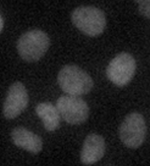

In [ ]:
original_image = cv2.imread("./touching_grayscale.png")
cv2_imshow(original_image)
# print(original_image.shape)

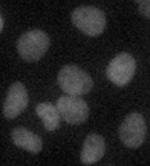

In [ ]:
img = cv2.imread('/content/touching_grayscale.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

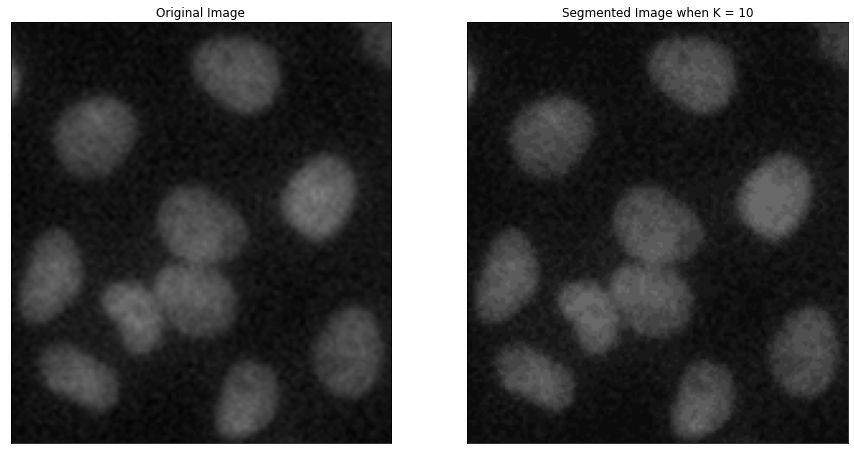

In [ ]:
pixels_vals = original_image.reshape((-1, 3))
pixel_vals = np.float32(pixels_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10 #check at K = 3 and K = 5
attempts = 10
ret, label, center = cv2.kmeans(pixel_vals, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((original_image.shape))
figure_size=15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,2,1), plt.imshow(original_image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result_image)
plt.title('Segmented Image when K = %i' %K), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
resultimage1 = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
otsu_threshold, image_result = cv2.threshold(resultimage1, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)
contours, hierarchy = cv2.findContours(image_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
  M = cv2.moments(c)
  if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
  else:
    cX, cY = 0, 0
  cv2.circle(resultimage1, (cX, cY), 1, (255, 0, 0), -1)

cv2.drawContours(image_result, contours, -1, (0, 255, 0), 3)


Obtained threshold:  45.0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

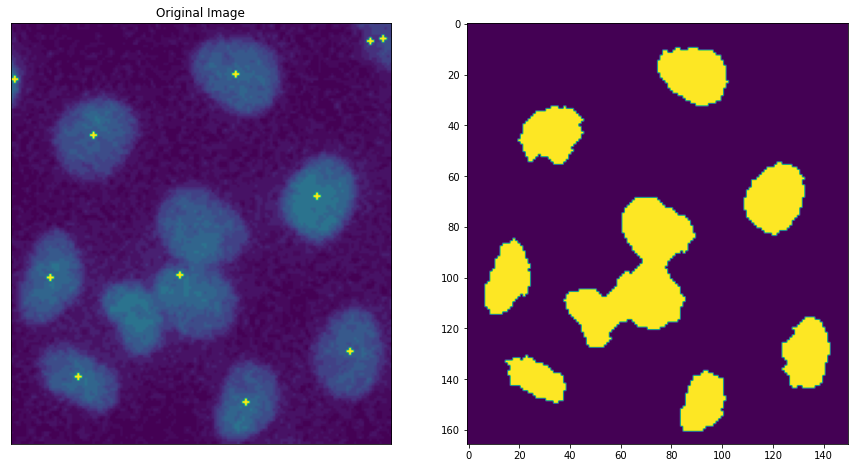

In [ ]:
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,2,1), plt.imshow(resultimage1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(image_result)
plt.show()